# Linux Transfer Learning notebook - Dataset Inspection

The goal of this notebook is to simply see how much the options are represented in datasets.

In [1]:
import pandas as pd
df_413 = pd.read_pickle("datasets/dataset_413.pkl")
df_415 = pd.read_pickle("datasets/dataset_415.pkl")

In [2]:
size_columns = ["GZIP-bzImage", "GZIP-vmlinux", "GZIP", "BZIP2-bzImage", "vmlinux", 
              "BZIP2-vmlinux", "BZIP2", "LZMA-bzImage", "LZMA-vmlinux", "LZMA", "XZ-bzImage", "XZ-vmlinux", "XZ", 
              "LZO-bzImage", "LZO-vmlinux", "LZO", "LZ4-bzImage", "LZ4-vmlinux", "LZ4"]

## Dataset 4.13

Computing the mean value of each columns. As each options is encoded as either 0 or 1, the mean value represents the share of examples when the options is activated.

In [5]:
column_mean = {}

for c in df_413.drop(columns=size_columns+["cid","active_options"], errors="ignore").columns.values:
    column_mean[c] = df_413[c].mean()

In [6]:
s = pd.Series(column_mean)
s.describe()

count    9467.000000
mean        0.177239
std         0.191308
min         0.000011
25%         0.039725
50%         0.117100
75%         0.247213
max         0.999989
dtype: float64

Note than as options with only one value represented are removed from the dataset, the "max" value can not be 1.

In [10]:
print("More than 99% : {} - {:.2f}%".format( len(s[(s>0.99) ]), len(s[(s>0.99) ])/len(s) * 100 ) )
print("Between 90% and 99% : {} - {:.2f}%".format(  len(s[((s>0.9) & (s<=0.99))]), len(s[((s>0.9) & (s<=0.99))])/len(s) * 100 ))
print("Between 10% and 90% : {} - {:.2f}%".format(  len(s[((s>=0.1) & (s<=0.9))]), len(s[((s>=0.1) & (s<=0.9))])/len(s) * 100 ))
print("Between 1% and 10% : {} - {:.2f}%".format(  len(s[((s>=0.01) & (s<0.1))]), len(s[((s>=0.01) & (s<0.1))])/len(s) * 100 ))
print("Less than 1% : {} - {:.2f}%".format(  len(s[(s<0.01) ]),  len(s[(s<0.01) ])/len(s) ))

More than 99% : 92 - 0.97%
Between 90% and 99% : 40 - 0.42%
Between 10% and 90% : 4991 - 52.72%
Between 1% and 10% : 3660 - 38.66%
Less than 1% : 684 - 0.07%


More than half the options have value at 0 and 1 in at least 10% of the examples.

Text(4500, -0.02, '684')

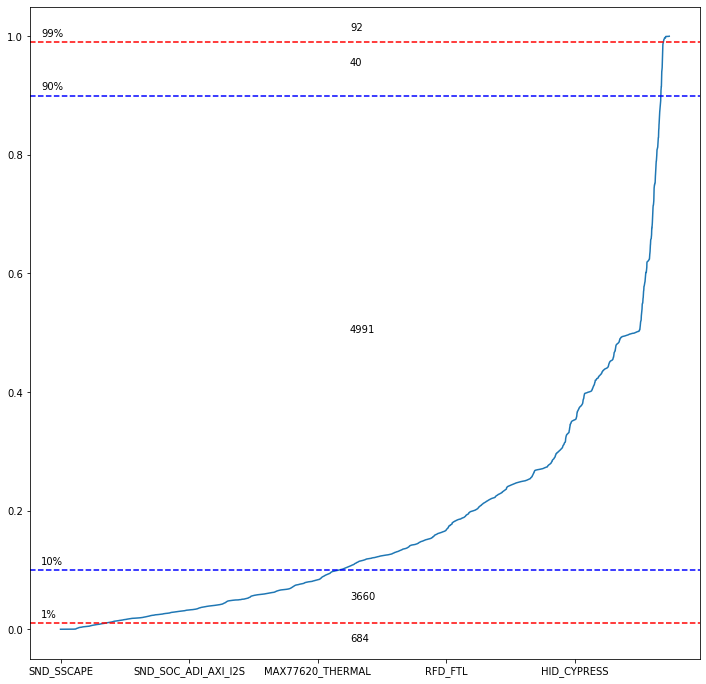

In [9]:
ax = s.sort_values().plot(figsize=(12,12))

ax.axhline(0.01, color="red", linestyle="--")
ax.text(-300,0.02, "1%")

ax.axhline(0.1, color="blue", linestyle="--")
ax.text(-300,0.11, "10%")

ax.axhline(0.9, color="blue", linestyle="--")
ax.text(-300,0.91, "90%")

ax.axhline(0.99, color="red", linestyle="--")
ax.text(-300,1, "99%")


ax.text(4500, 1.01, len(s[(s>0.99) ]))
ax.text(4500, 0.95, len(s[((s>0.9) & (s<=0.99))]))
ax.text(4500, 0.5, len(s[((s>=0.1) & (s<=0.9))]))
ax.text(4500, 0.05, len(s[((s>=0.01) & (s<0.1))]))
ax.text(4500, -0.02, len(s[(s<0.01) ]))


### Feature Ranking List

In [26]:
import json
with open("feature_ranking_list.json","r") as f:
    feature_ranking_list = json.load(f)

In [16]:
column_mean = {}

for c in df_413[feature_ranking_list[:300]].drop(columns=["active_options"]).columns.values:
    column_mean[c] = df_413[c].mean()
s = pd.Series(column_mean)
s.describe()

count    299.000000
mean       0.195813
std        0.166082
min        0.000011
25%        0.058663
50%        0.152417
75%        0.292350
max        0.744841
dtype: float64

In [17]:
print("More than 99% : {} - {:.2f}%".format( len(s[(s>0.99) ]), len(s[(s>0.99) ])/len(s) * 100 ) )
print("Between 90% and 99% : {} - {:.2f}%".format(  len(s[((s>0.9) & (s<=0.99))]), len(s[((s>0.9) & (s<=0.99))])/len(s) * 100 ))
print("Between 10% and 90% : {} - {:.2f}%".format(  len(s[((s>=0.1) & (s<=0.9))]), len(s[((s>=0.1) & (s<=0.9))])/len(s) * 100 ))
print("Between 1% and 10% : {} - {:.2f}%".format(  len(s[((s>=0.01) & (s<0.1))]), len(s[((s>=0.01) & (s<0.1))])/len(s) * 100 ))
print("Less than 1% : {} - {:.2f}%".format(  len(s[(s<0.01) ]),  len(s[(s<0.01) ])/len(s) ))

More than 99% : 0 - 0.00%
Between 90% and 99% : 0 - 0.00%
Between 10% and 90% : 186 - 62.21%
Between 1% and 10% : 89 - 29.77%
Less than 1% : 24 - 0.08%


The most important features, according to the Random Forests evaluating them, tend to be the one with a better balance in values represented.

In [27]:
column_mean = {}

for c in df_413[feature_ranking_list[:1500]].drop(columns=["active_options"]).columns.values:
    column_mean[c] = df_413[c].mean()
s = pd.Series(column_mean)
s.describe()

count    1499.000000
mean        0.231524
std         0.172109
min         0.000011
25%         0.089475
50%         0.202826
75%         0.350219
max         0.921382
dtype: float64

In [28]:
print("More than 99% : {} - {:.2f}%".format( len(s[(s>0.99) ]), len(s[(s>0.99) ])/len(s) * 100 ) )
print("Between 90% and 99% : {} - {:.2f}%".format(  len(s[((s>0.9) & (s<=0.99))]), len(s[((s>0.9) & (s<=0.99))])/len(s) * 100 ))
print("Between 10% and 90% : {} - {:.2f}%".format(  len(s[((s>=0.1) & (s<=0.9))]), len(s[((s>=0.1) & (s<=0.9))])/len(s) * 100 ))
print("Between 1% and 10% : {} - {:.2f}%".format(  len(s[((s>=0.01) & (s<0.1))]), len(s[((s>=0.01) & (s<0.1))])/len(s) * 100 ))
print("Less than 1% : {} - {:.2f}%".format(  len(s[(s<0.01) ]),  len(s[(s<0.01) ])/len(s) ))

More than 99% : 0 - 0.00%
Between 90% and 99% : 1 - 0.07%
Between 10% and 90% : 1085 - 72.38%
Between 1% and 10% : 349 - 23.28%
Less than 1% : 64 - 0.04%


Even with 1500 features, we can see the same bias, it's even more important.

## Dataset 4.15

In [21]:
column_mean = {}

for c in df_415.drop(columns=size_columns+["cid","active_options"], errors="ignore").columns.values:
    column_mean[c] = df_415[c].mean()

In [22]:
s = pd.Series(column_mean)
s.describe()

count    9424.000000
mean        0.179372
std         0.182579
min         0.000127
25%         0.048812
50%         0.121551
75%         0.247906
max         0.999695
dtype: float64

In [23]:
print("More than 99% : {} - {:.2f}%".format( len(s[(s>0.99) ]), len(s[(s>0.99) ])/len(s) * 100 ) )
print("Between 90% and 99% : {} - {:.2f}%".format(  len(s[((s>0.9) & (s<=0.99))]), len(s[((s>0.9) & (s<=0.99))])/len(s) * 100 ))
print("Between 10% and 90% : {} - {:.2f}%".format(  len(s[((s>=0.1) & (s<=0.9))]), len(s[((s>=0.1) & (s<=0.9))])/len(s) * 100 ))
print("Between 1% and 10% : {} - {:.2f}%".format(  len(s[((s>=0.01) & (s<0.1))]), len(s[((s>=0.01) & (s<0.1))])/len(s) * 100 ))
print("Less than 1% : {} - {:.2f}%".format(  len(s[(s<0.01) ]),  len(s[(s<0.01) ])/len(s) ))

More than 99% : 50 - 0.53%
Between 90% and 99% : 33 - 0.35%
Between 10% and 90% : 5229 - 55.49%
Between 1% and 10% : 3696 - 39.22%
Less than 1% : 416 - 0.04%


We can observe almost the same distribution as for 4.13 dataset.

Text(4500, -0.02, '416')

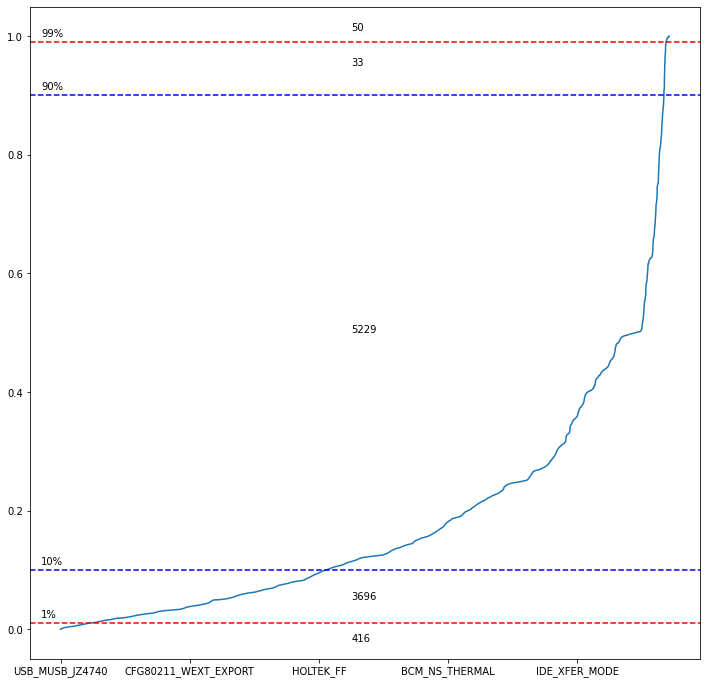

In [24]:
ax = s.sort_values().plot(figsize=(12,12))

ax.axhline(0.01, color="red", linestyle="--")
ax.text(-300,0.02, "1%")

ax.axhline(0.1, color="blue", linestyle="--")
ax.text(-300,0.11, "10%")

ax.axhline(0.9, color="blue", linestyle="--")
ax.text(-300,0.91, "90%")

ax.axhline(0.99, color="red", linestyle="--")
ax.text(-300,1, "99%")


ax.text(4500, 1.01, len(s[(s>0.99) ]))
ax.text(4500, 0.95, len(s[((s>0.9) & (s<=0.99))]))
ax.text(4500, 0.5, len(s[((s>=0.1) & (s<=0.9))]))
ax.text(4500, 0.05, len(s[((s>=0.01) & (s<0.1))]))
ax.text(4500, -0.02, len(s[(s<0.01) ]))


### Feature Ranking List

In [29]:
import json
with open("feature_ranking_list_415.json","r") as f:
    feature_ranking_list = json.load(f)
    
column_mean = {}

for c in df_415[feature_ranking_list[:300]].drop(columns=["active_options"]).columns.values:
    column_mean[c] = df_415[c].mean()
s = pd.Series(column_mean)
s.describe()

count    299.000000
mean       0.217322
std        0.165935
min        0.011094
25%        0.096075
50%        0.159656
75%        0.296971
max        0.841994
dtype: float64

In [30]:
print("More than 99% : {} - {:.2f}%".format( len(s[(s>0.99) ]), len(s[(s>0.99) ])/len(s) * 100 ) )
print("Between 90% and 99% : {} - {:.2f}%".format(  len(s[((s>0.9) & (s<=0.99))]), len(s[((s>0.9) & (s<=0.99))])/len(s) * 100 ))
print("Between 10% and 90% : {} - {:.2f}%".format(  len(s[((s>=0.1) & (s<=0.9))]), len(s[((s>=0.1) & (s<=0.9))])/len(s) * 100 ))
print("Between 1% and 10% : {} - {:.2f}%".format(  len(s[((s>=0.01) & (s<0.1))]), len(s[((s>=0.01) & (s<0.1))])/len(s) * 100 ))
print("Less than 1% : {} - {:.2f}%".format(  len(s[(s<0.01) ]),  len(s[(s<0.01) ])/len(s) ))

More than 99% : 0 - 0.00%
Between 90% and 99% : 0 - 0.00%
Between 10% and 90% : 221 - 73.91%
Between 1% and 10% : 78 - 26.09%
Less than 1% : 0 - 0.00%


In [31]:
column_mean = {}

for c in df_415[feature_ranking_list[:1500]].drop(columns=["active_options"]).columns.values:
    column_mean[c] = df_415[c].mean()
s = pd.Series(column_mean)
s.describe()

count    1499.000000
mean        0.246713
std         0.166596
min         0.001549
25%         0.110685
50%         0.223452
75%         0.355500
max         0.931126
dtype: float64

In [32]:
print("More than 99% : {} - {:.2f}%".format( len(s[(s>0.99) ]), len(s[(s>0.99) ])/len(s) * 100 ) )
print("Between 90% and 99% : {} - {:.2f}%".format(  len(s[((s>0.9) & (s<=0.99))]), len(s[((s>0.9) & (s<=0.99))])/len(s) * 100 ))
print("Between 10% and 90% : {} - {:.2f}%".format(  len(s[((s>=0.1) & (s<=0.9))]), len(s[((s>=0.1) & (s<=0.9))])/len(s) * 100 ))
print("Between 1% and 10% : {} - {:.2f}%".format(  len(s[((s>=0.01) & (s<0.1))]), len(s[((s>=0.01) & (s<0.1))])/len(s) * 100 ))
print("Less than 1% : {} - {:.2f}%".format(  len(s[(s<0.01) ]),  len(s[(s<0.01) ])/len(s) ))

More than 99% : 0 - 0.00%
Between 90% and 99% : 1 - 0.07%
Between 10% and 90% : 1178 - 78.59%
Between 1% and 10% : 316 - 21.08%
Less than 1% : 4 - 0.00%
